# Can we develop a model to predict short-term price movements for FAANG stocks based on historical price patterns, volume, and volatility indicators?

<h2>Data Collection and Cleaning</h2>

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('FAANG.csv')
data.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,2005-01-03,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3575092084736,...,53.66043,3569143513088,101304000512,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,2005-01-04,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3575092084736,...,53.66043,3569143513088,101304000512,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,2005-01-05,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3575092084736,...,53.66043,3569143513088,101304000512,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,2005-01-06,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3575092084736,...,53.66043,3569143513088,101304000512,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,2005-01-07,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3575092084736,...,53.66043,3569143513088,101304000512,NaN,NaN,1.239,1.0,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company                                23055 non-null  object 
 1   Ticker                                 23055 non-null  object 
 2   Date                                   23055 non-null  object 
 3   Open                                   23055 non-null  float64
 4   High                                   23055 non-null  float64
 5   Low                                    23055 non-null  float64
 6   Close                                  23055 non-null  float64
 7   Adj Close                              23055 non-null  float64
 8   Volume                                 23055 non-null  int64  
 9   Market Cap                             23055 non-null  int64  
 10  PE Ratio                               23055 non-null  float64
 11  Be

Columns such as Revenue, Gross Profit, Operating Income, Cash Ratio, Total Assets, Total Equity, Trailing Twelve Months (TTM) Revenue, TTM EBITDA, and TTM Earnings have 0 non-null entries, making them irrelevant due to the complete absence of data. Columns like Beta and Beta (5Y) have partial missing data but may still hold some value. 

For our research goal, we will utlize the columns that help us understand historical price patterns, volume, and volatility indicators. 

These are: 
- Price and Volume: Open, High, Low, Close, Adj Close, Volume
- Volatility Indicators: Beta, Beta (5Y)
- Basic Financial Ratios: PE Ratio, Debt to Equity, Return on Equity (ROE), Current Ratio, Quick Ratio, Price to Book Ratio

<h2>Column Relevance Analysis</h2>

1. <b>Price and Volume</b>: Open, High, Low, Close, Adj Close, Volume
- Highly Relevant: These columns are essential for understanding historical price trends and calculating various technical indicators (e.g., moving averages, RSI, MACD). Volume, in particular, is crucial for gauging trading activity and potential price momentum.

2. <b>Volatility Indicators</b>: Beta, Beta (5Y)
- Moderately Relevant: Beta is a measure of a stock's volatility relative to the overall market. While it can provide insight into how sensitive a stock is to market movements, its impact may be more noticeable over longer periods. For short-term predictions, it could be used as a contextual feature, but it is not as impactful as technical indicators derived from historical prices.

3. <b>Basic Financial Ratios</b>: PE Ratio, Debt to Equity, Return on Equity (ROE), Current Ratio, Quick Ratio, Price to Book Ratio
- Less Relevant for Short-Term Analysis: These financial ratios are more suited for evaluating the company's fundamental strength and long-term value. While they can provide context for understanding stock performance, they are not primary indicators of short-term price movements, which are often driven by market sentiment, technical patterns, and trading volume.

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,EPS,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
count,23055.000000,23055.000000,23055.000000,23055.000000,23055.000000,2.305500e+04,2.305500e+04,23055.000000,18073.000000,23055.00000,...,23055.000000,2.305500e+04,2.305500e+04,0.0,0.0,18073.000000,13091.000000,0.0,0.0,0.0
mean,93.647661,94.863101,92.420934,93.672274,93.206572,1.384445e+08,1.910403e+12,35.912447,1.154244,10.29935,...,19.221725,1.889730e+12,7.081389e+10,NaN,NaN,1.154244,1.162585,NaN,NaN,NaN
std,126.060231,127.749769,124.330704,126.069016,126.123574,2.430001e+08,1.083314e+12,8.300362,0.079878,6.07117,...,18.271000,1.089725e+12,5.492211e+10,NaN,NaN,0.079878,0.476994,NaN,NaN,NaN
min,1.139107,1.159107,1.117857,1.130179,0.954409,1.144000e+06,3.247530e+11,23.492826,1.038000,4.18000,...,6.708661,3.012360e+11,1.598133e+10,NaN,NaN,1.038000,0.800000,NaN,NaN,NaN
25%,11.728979,11.864486,11.587829,11.720929,11.366614,2.131500e+07,1.465347e+12,29.612986,1.038000,6.57000,...,8.437223,1.439438e+12,2.871900e+10,NaN,NaN,1.038000,0.800000,NaN,NaN,NaN
50%,38.584999,38.983002,38.297501,38.598499,38.050781,5.576380e+07,1.996001e+12,35.789955,1.147000,6.97000,...,9.359326,1.933662e+12,3.799100e+10,NaN,NaN,1.147000,1.000000,NaN,NaN,NaN
75%,134.849998,136.550003,133.449997,134.970001,134.173950,1.302896e+08,2.024576e+12,42.824500,1.239000,17.67000,...,14.262457,2.036984e+12,1.013040e+11,NaN,NaN,1.239000,1.000000,NaN,NaN,NaN
max,734.900024,736.000000,722.500000,730.289978,730.289978,3.372970e+09,3.575092e+12,45.496414,1.239000,19.56000,...,53.660430,3.569144e+12,1.578420e+11,NaN,NaN,1.239000,2.000000,NaN,NaN,NaN


<h3>Handling Missing Data</h3>

In [9]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Beta                                      4982
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Dividends Paid                            9964
Dividend Yield                            9964
Cash Ratio                               23055
Total Assets                             23055
Total Equity                             23055
Beta (5Y)                                 4982
Annual Dividend Rate                      9964
Trailing Twelve Months (TTM) Revenue     23055
Trailing Twelve Months (TTM) EBITDA      23055
Trailing Twelve Months (TTM) Earnings    23055
dtype: int64


<h2>Imputing Values for the Beta columns</h2>

In [11]:
data['Beta'] = data['Beta'].fillna(data['Beta'].median())
data['Beta (5Y)'] = data['Beta (5Y)'].fillna(data['Beta (5Y)'].median())

In [13]:
data['Dividends Paid'] = data['Dividends Paid'].fillna(0)
data['Dividend Yield'] = data['Dividend Yield'].fillna(0)
data['Annual Dividend Rate'] = data['Annual Dividend Rate'].fillna(0)

In [15]:
# Dropping columns with 0 non-null values
# Drop columns with 0 non-null values
columns_to_drop = [
    'Revenue', 'Gross Profit', 'Operating Income', 'Cash Ratio',
    'Total Assets', 'Total Equity', 'Trailing Twelve Months (TTM) Revenue',
    'Trailing Twelve Months (TTM) EBITDA', 'Trailing Twelve Months (TTM) Earnings'
]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

# Verify data structure
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   23055 non-null  object 
 1   Ticker                    23055 non-null  object 
 2   Date                      23055 non-null  object 
 3   Open                      23055 non-null  float64
 4   High                      23055 non-null  float64
 5   Low                       23055 non-null  float64
 6   Close                     23055 non-null  float64
 7   Adj Close                 23055 non-null  float64
 8   Volume                    23055 non-null  int64  
 9   Market Cap                23055 non-null  int64  
 10  PE Ratio                  23055 non-null  float64
 11  Beta                      23055 non-null  float64
 12  EPS                       23055 non-null  float64
 13  Forward PE                23055 non-null  float64
 14  Net In

<h2>Exploratory Data Analysis</h2>

In [17]:
# converting to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
# date will be index
data.set_index('Date', inplace=True)

In [21]:
# seeing basic statistics for numerical columns
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count  23055.000000  23055.000000  23055.000000  23055.000000  23055.000000   
mean      93.647661     94.863101     92.420934     93.672274     93.206572   
std      126.060231    127.749769    124.330704    126.069016    126.123574   
min        1.139107      1.159107      1.117857      1.130179      0.954409   
25%       11.728979     11.864486     11.587829     11.720929     11.366614   
50%       38.584999     38.983002     38.297501     38.598499     38.050781   
75%      134.849998    136.550003    133.449997    134.970001    134.173950   
max      734.900024    736.000000    722.500000    730.289978    730.289978   

             Volume    Market Cap      PE Ratio          Beta          EPS  \
count  2.305500e+04  2.305500e+04  23055.000000  23055.000000  23055.00000   
mean   1.384445e+08  1.910403e+12     35.912447      1.152678     10.29935   
std    2.430001e+08  1.083314e+12      8.300362      0

<h2>Segment the data by Company and perform EDA for each subset individually</h2>

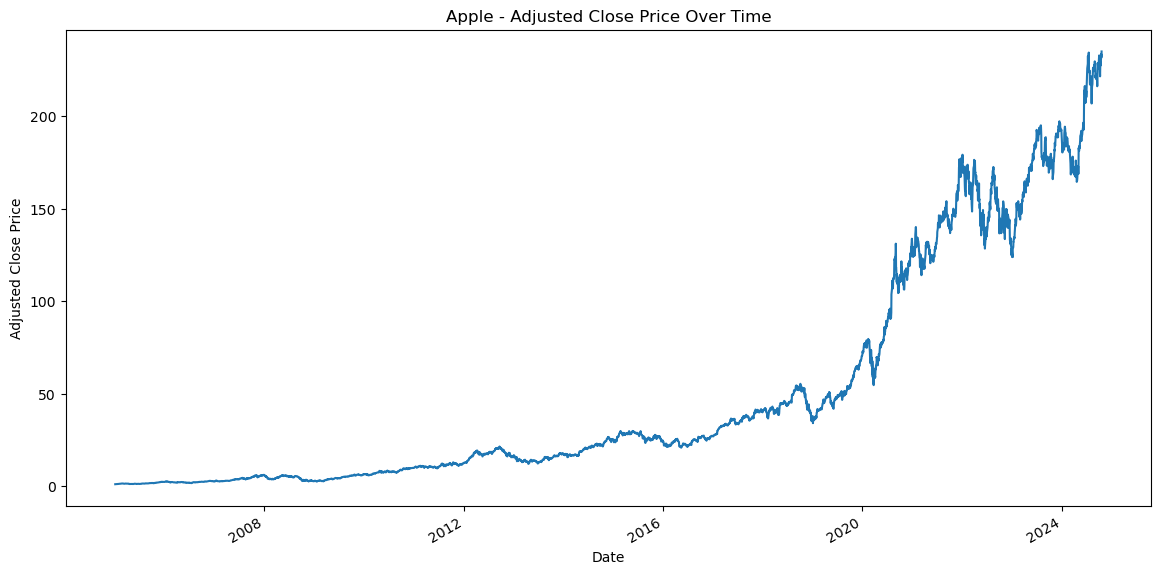

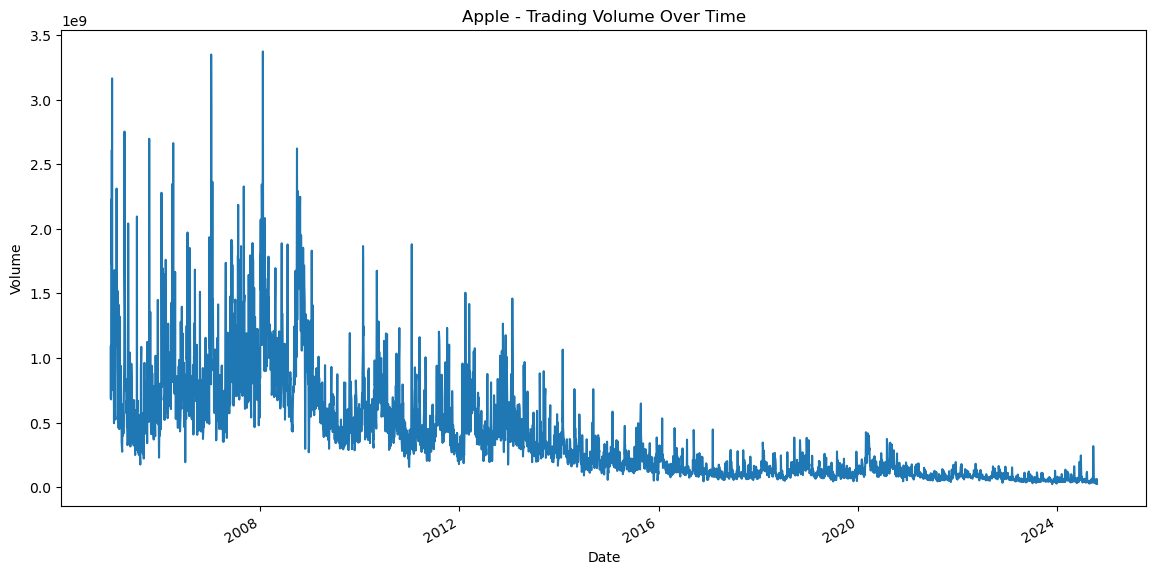

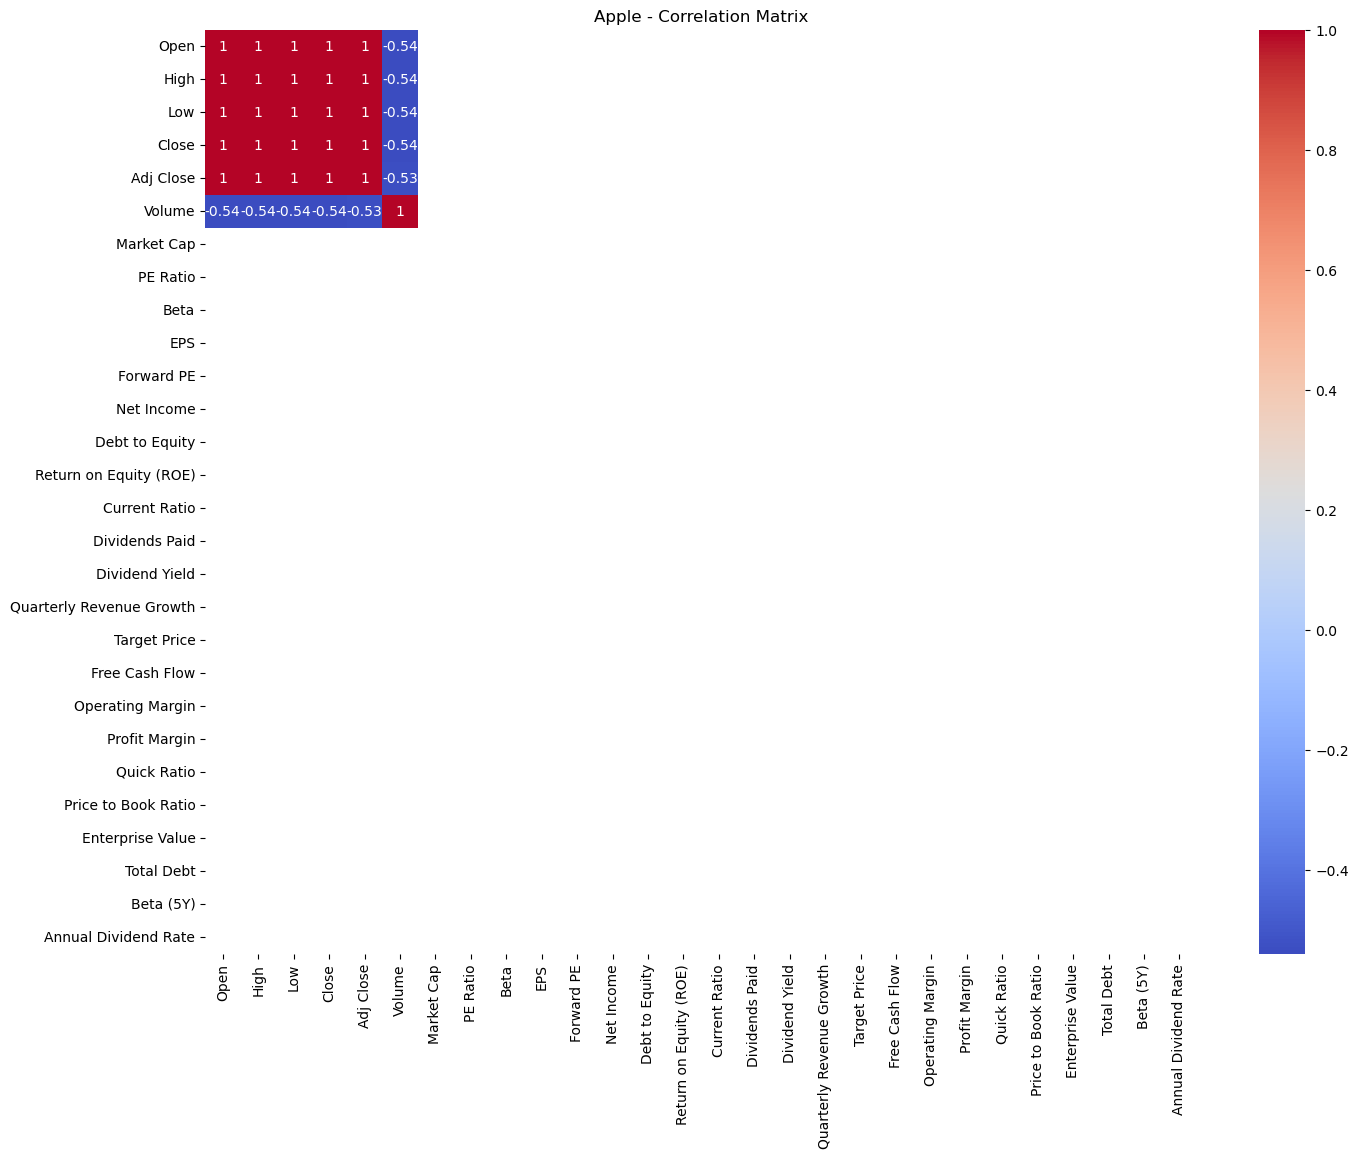

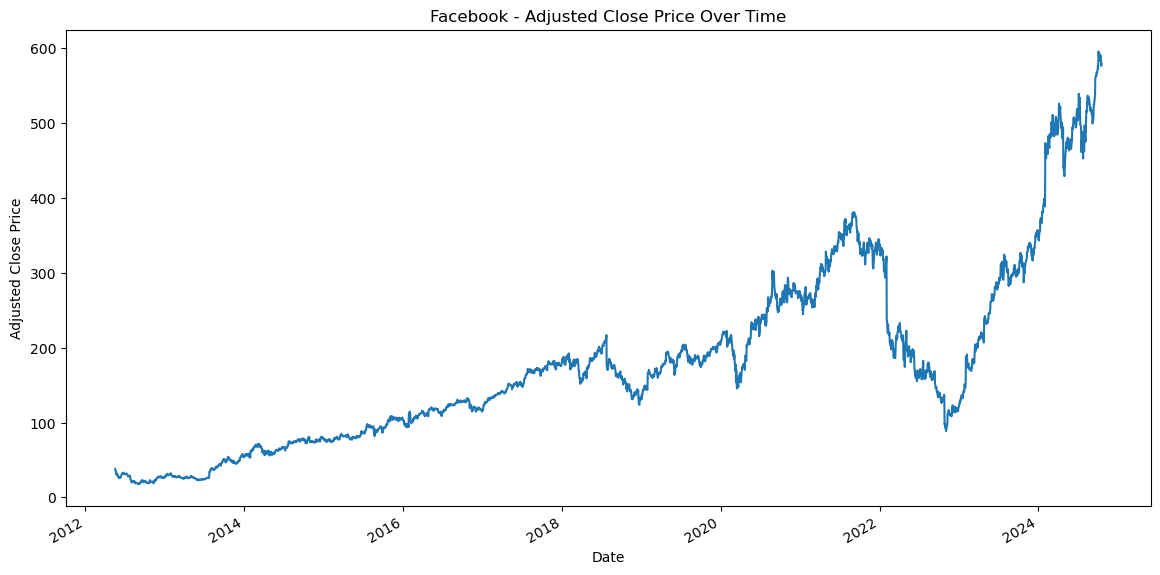

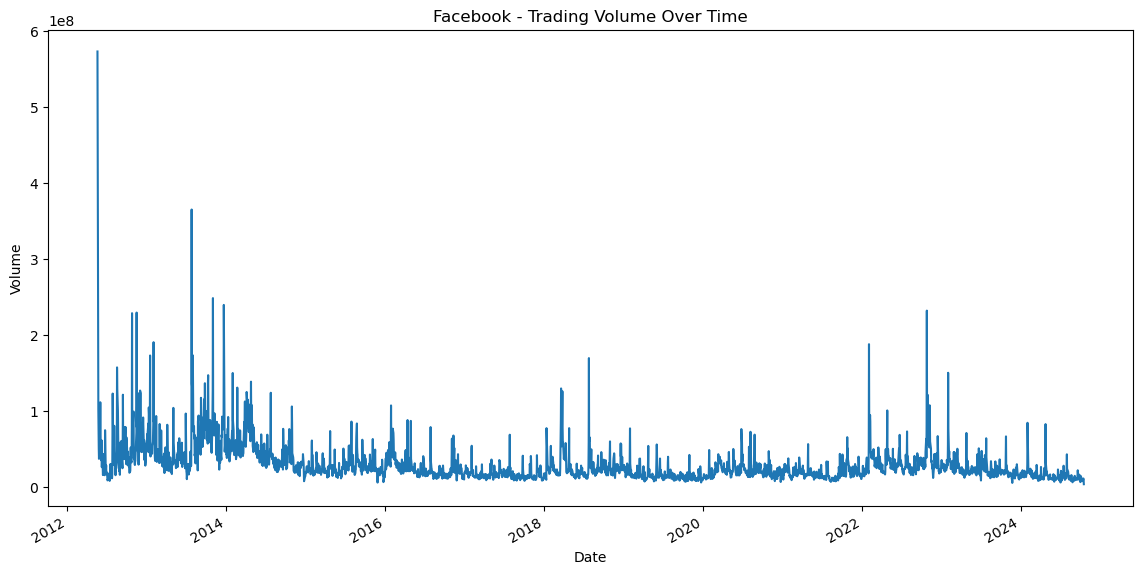

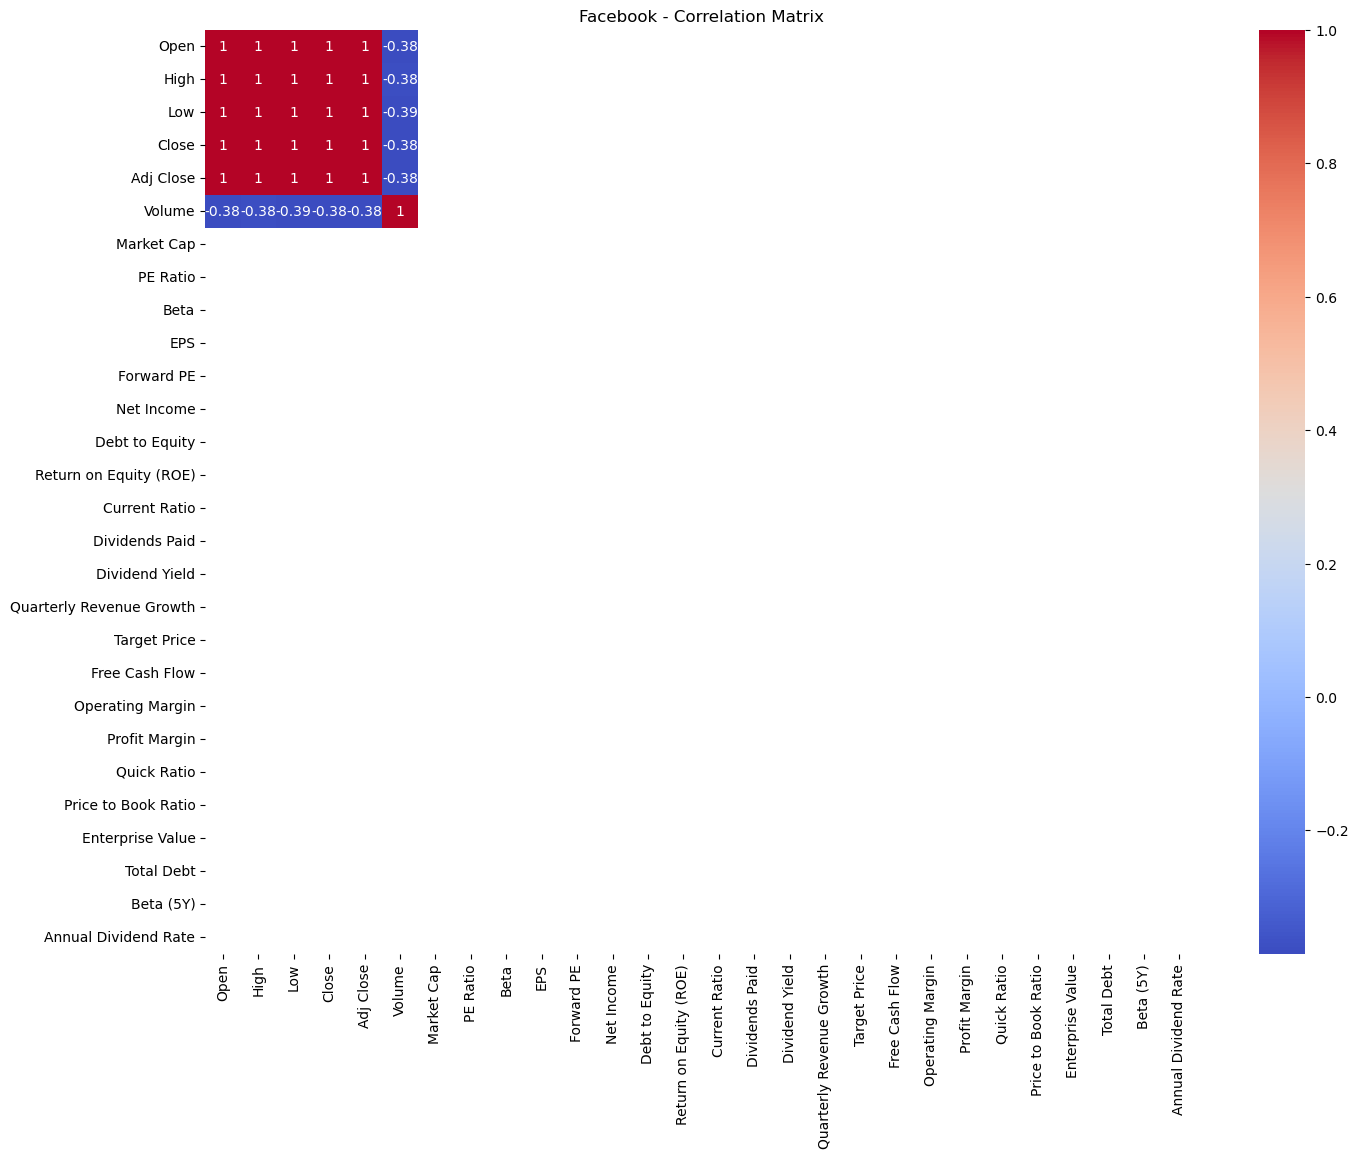

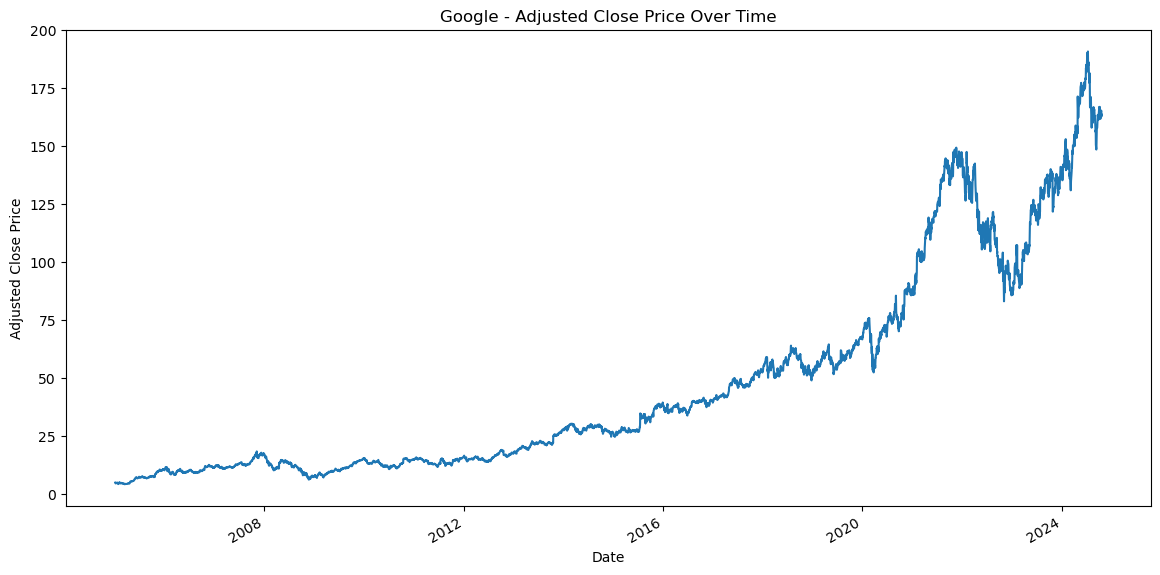

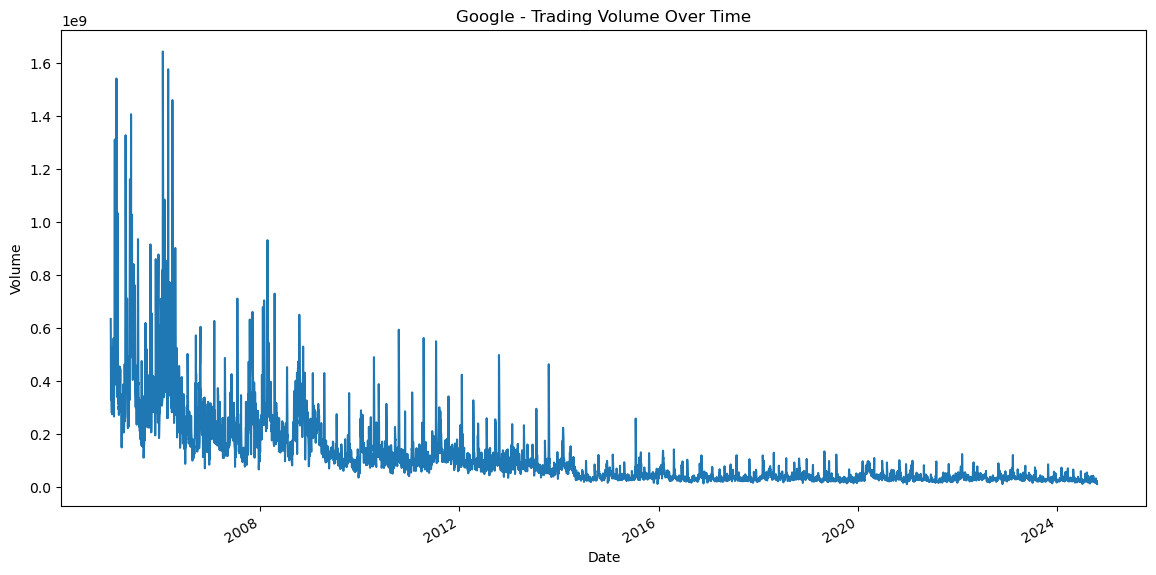

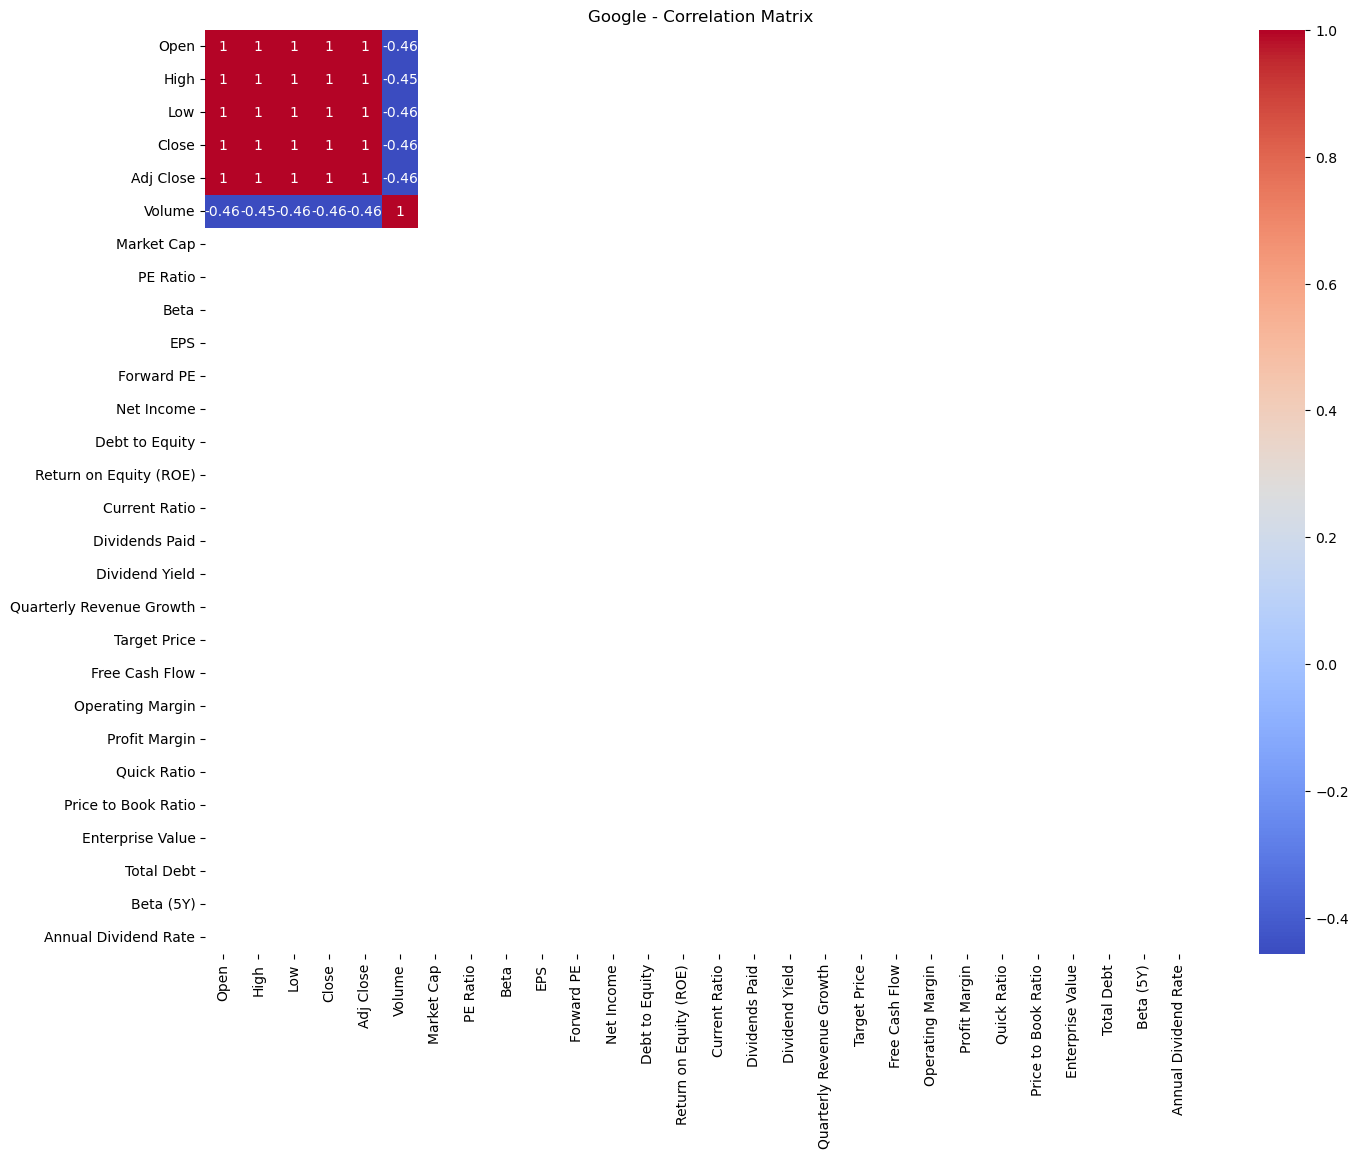

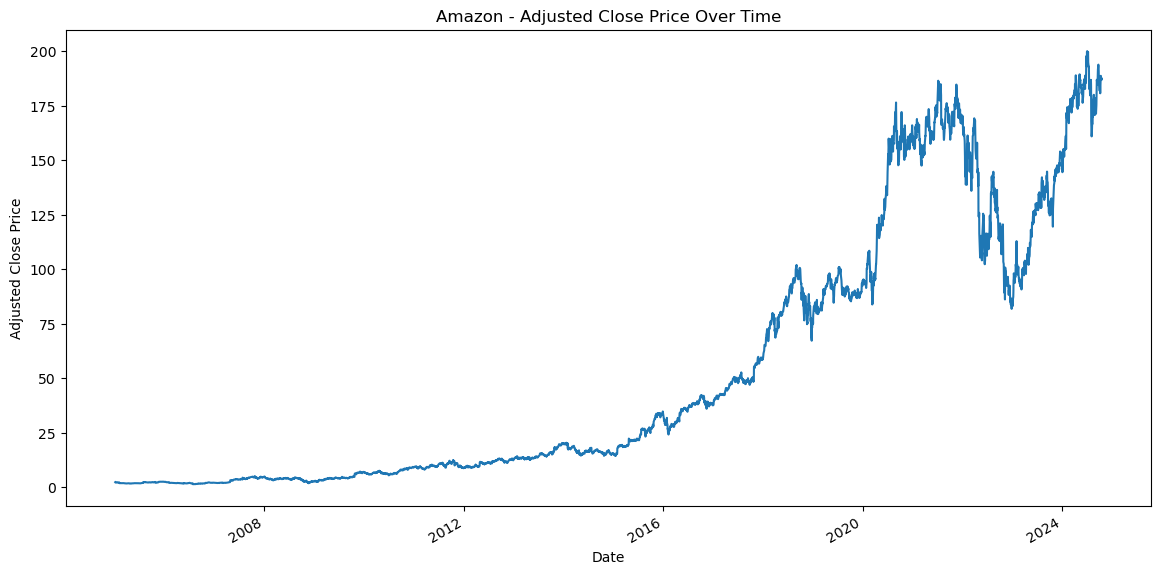

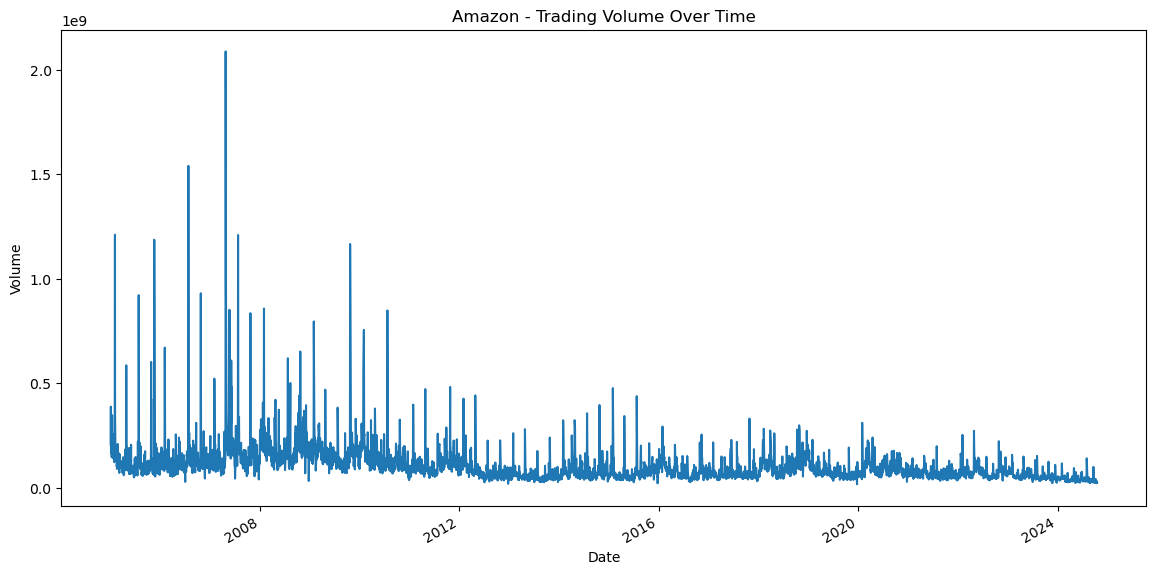

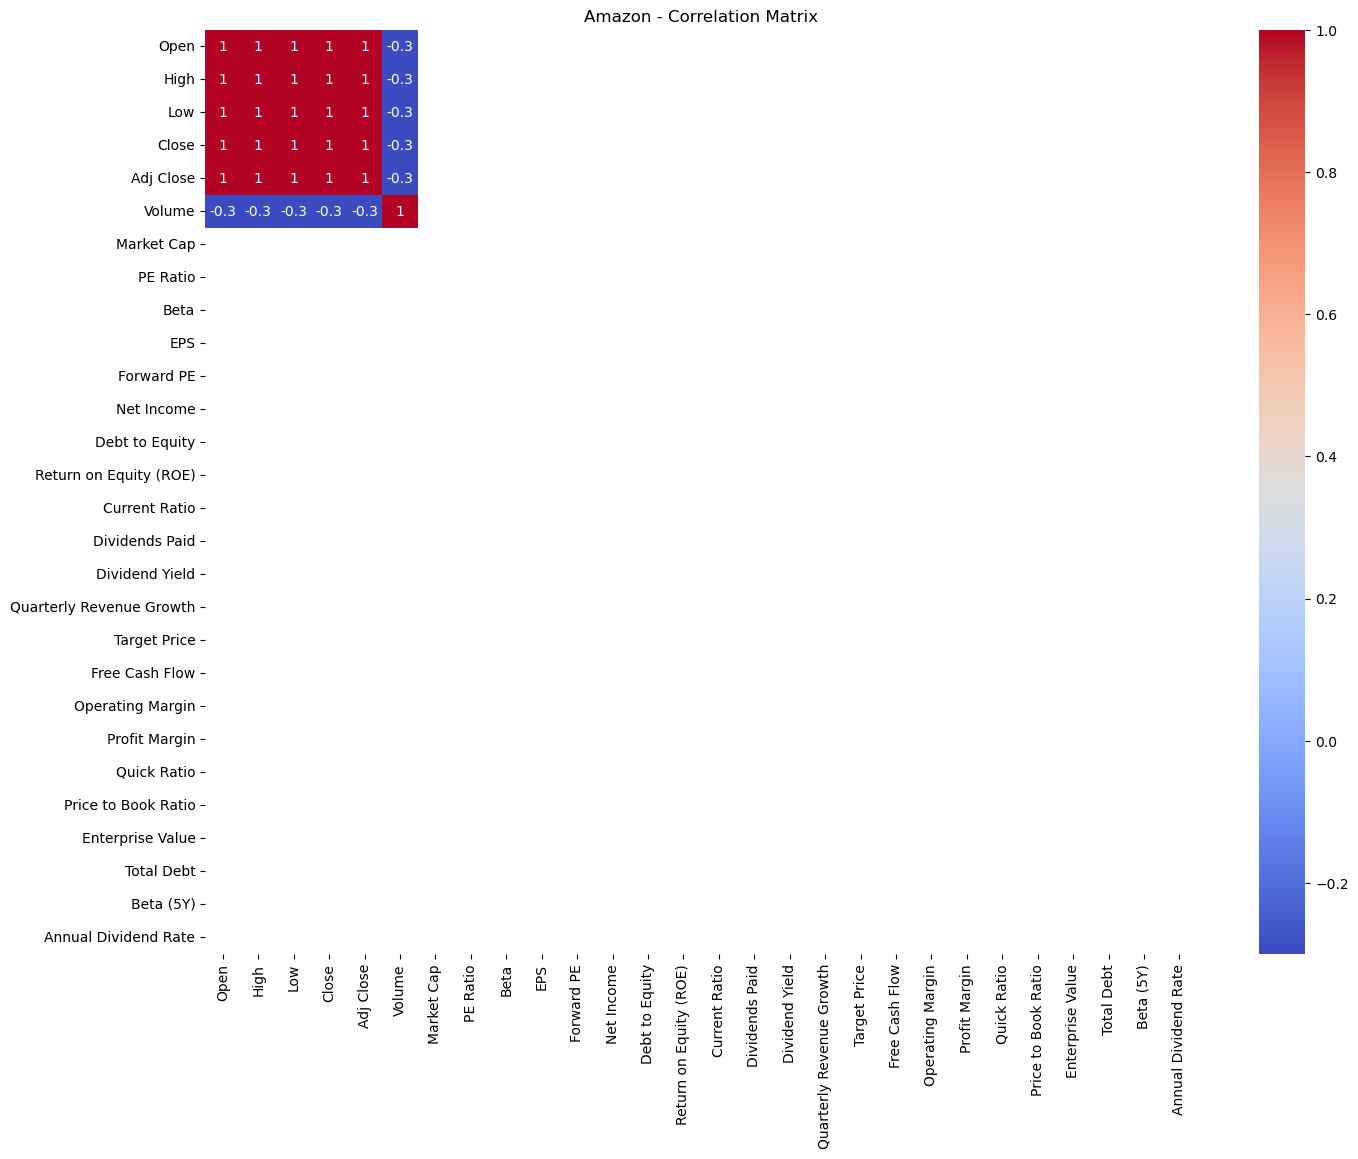

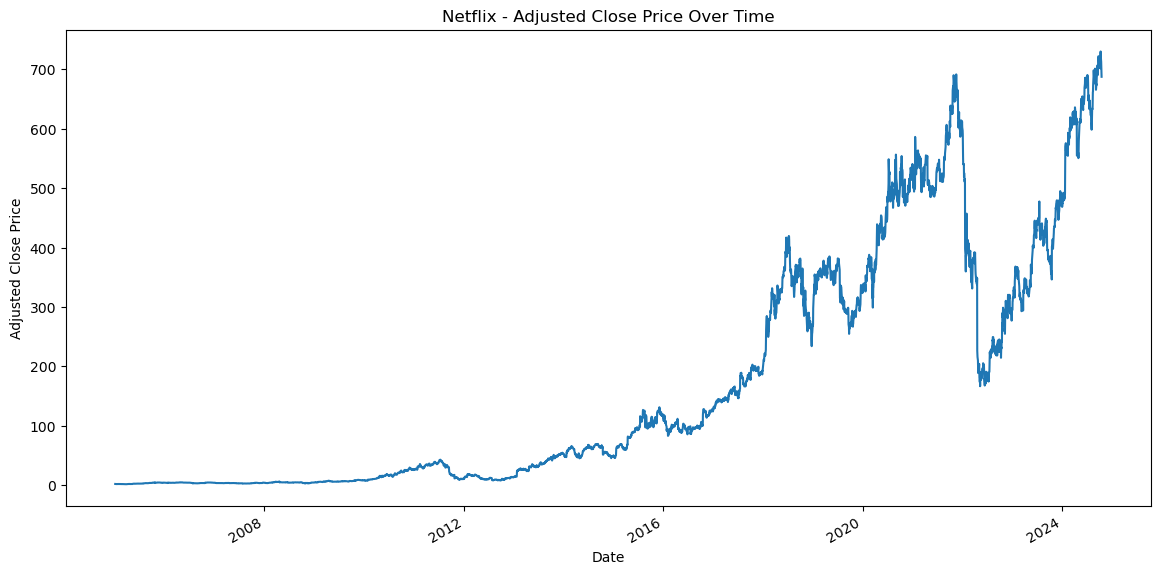

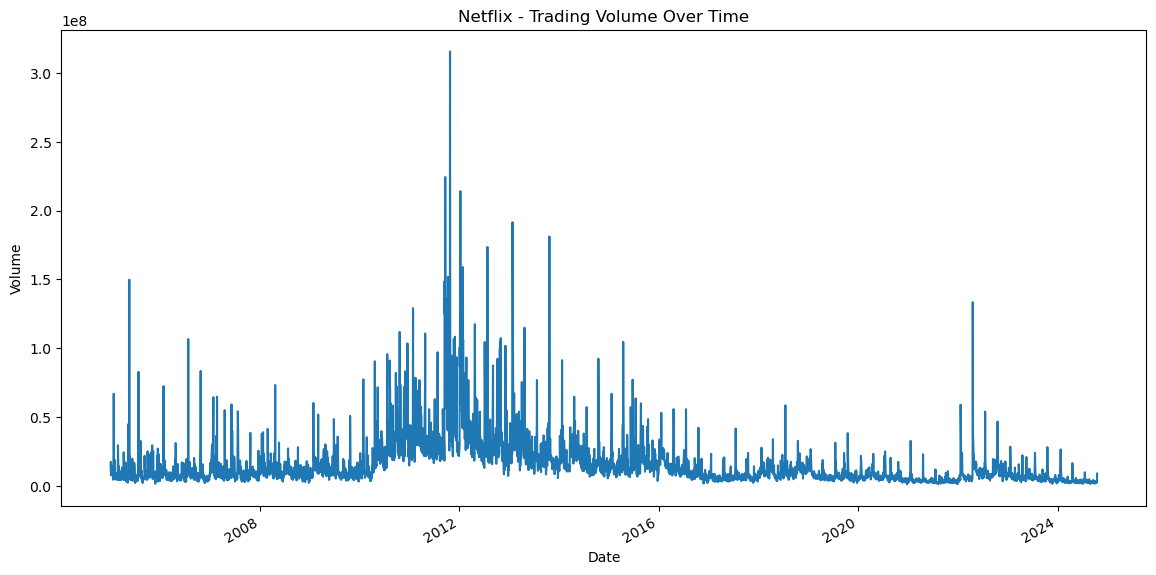

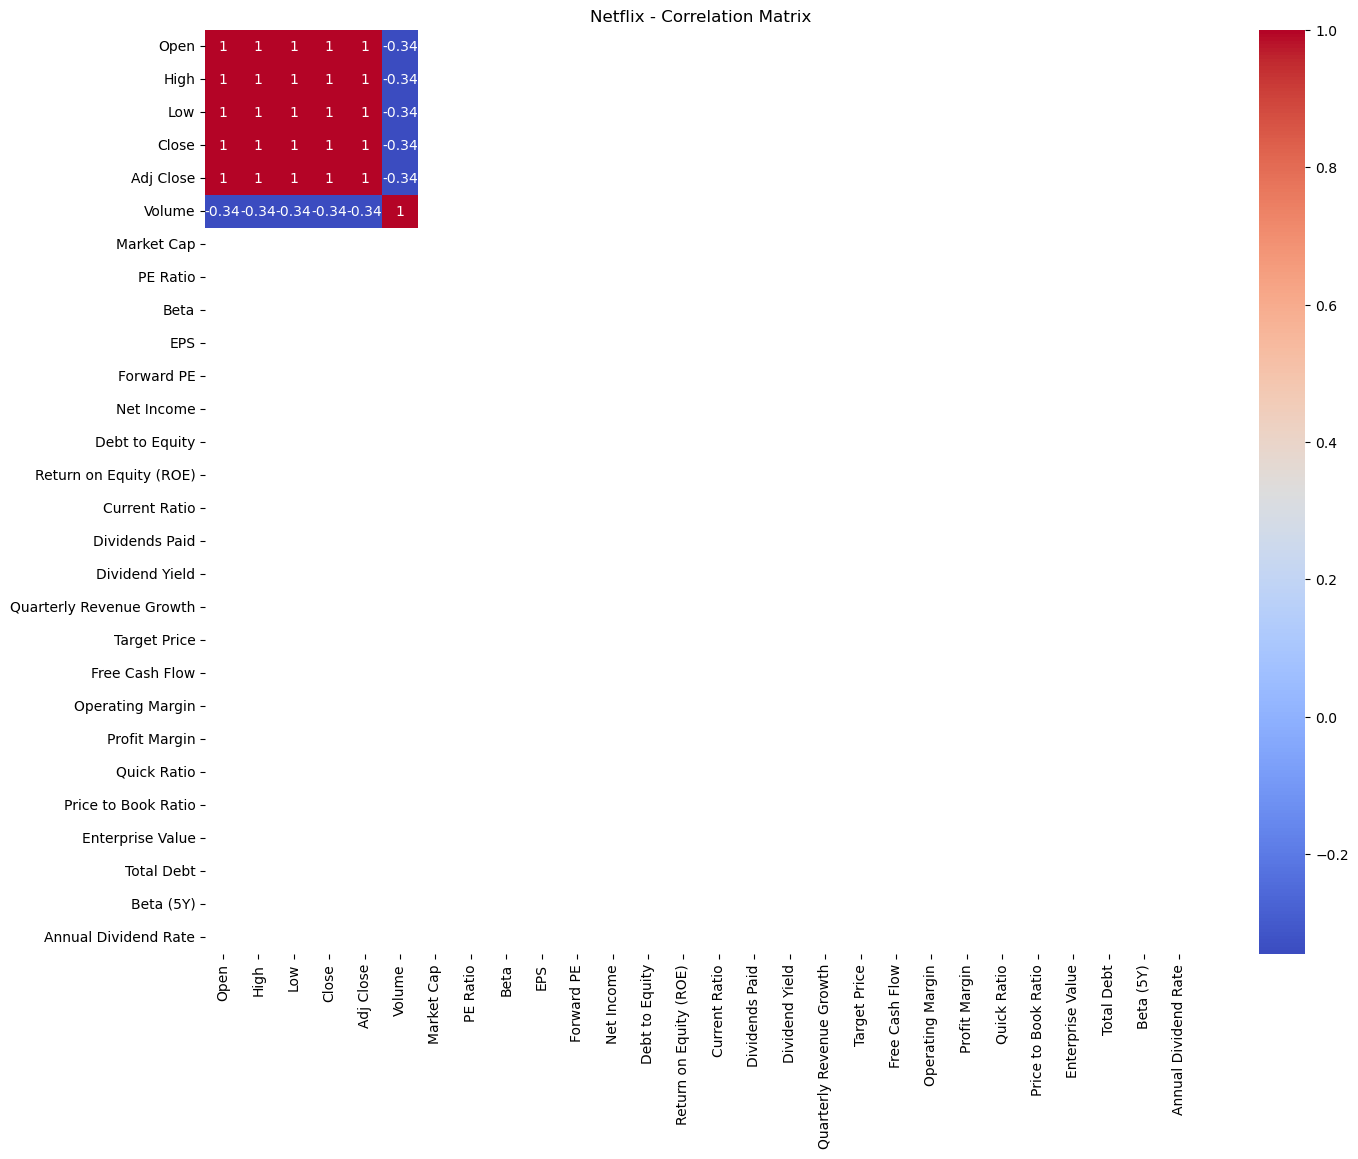

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loop through each company and perform EDA
for company in data['Company'].unique():
    company_data = data[data['Company'] == company]
    
    # Plotting closing prices over time
    plt.figure(figsize=(14, 7))
    company_data['Adj Close'].plot(title=f'{company} - Adjusted Close Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.show()

    # Plotting volume over time
    plt.figure(figsize=(14, 7))
    company_data['Volume'].plot(kind='line', title=f'{company} - Trading Volume Over Time')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()

    # Correlation matrix for each company (numeric columns only)
    plt.figure(figsize=(16, 12))
    numeric_data = company_data.select_dtypes(include=[np.number])  # Select only numeric columns
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'{company} - Correlation Matrix')
    plt.show()

In [58]:
company_data = data  

<h2>Feature Engineering</h2>

In [ ]:
# need additional features derived from historical data, engineered features will provide your model with more relevant signals for price prediction

<h3>Moving Averages - Compute short-term (e.g., 5-day) and medium-term (e.g., 20-day) moving averages on Close or Adj Close prices to capture trends.</h3>

In [60]:
company_data = company_data.copy()
company_data['SMA_5'] = company_data['Adj Close'].rolling(window=5).mean()
company_data['SMA_20'] = company_data['Adj Close'].rolling(window=20).mean()

<h3>Volatility Indicators - Calculate Bollinger Bands or Average True Range (ATR) to capture stock volatility, which can help predict price movement</h3>

In [62]:
company_data = company_data.copy()
company_data['std_dev'] = company_data['Adj Close'].rolling(window=20).std()
company_data['Upper_BB'] = company_data['SMA_20'] + (company_data['std_dev'] * 2)
company_data['Lower_BB'] = company_data['SMA_20'] - (company_data['std_dev'] * 2)

<h3>Momentum Indicators - Relative Strength Index (RSI) or Moving Average Convergence Divergence (MACD) can be useful for predicting short-term reversals.</h3>

In [64]:
company_data = company_data.copy()
delta = company_data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
company_data['RSI'] = 100 - (100 / (1 + rs))

<h2>Model Development</h2>

In [66]:
company_data.head()

,Company,Ticker,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,SMA_5,SMA_20,std_dev,Upper_BB,Lower_BB,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,Apple,AAPL,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04,Apple,AAPL,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05,Apple,AAPL,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-06,Apple,AAPL,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-07,Apple,AAPL,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,0.981793,NaN,NaN,NaN,NaN,NaN


In [68]:
missing_values = company_data.isnull().sum()
print(missing_values[missing_values > 0])

SMA_5        4
SMA_20      19
std_dev     19
Upper_BB    19
Lower_BB    19
RSI         13
dtype: int64


In [70]:
company_data = company_data.dropna()

In [72]:
missing_values = company_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [74]:
company_data.head()

,Company,Ticker,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,SMA_5,SMA_20,std_dev,Upper_BB,Lower_BB,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-31,Apple,AAPL,1.331786,1.390893,1.330536,1.373214,1.159645,1681097600,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,1.109339,1.043960,0.056091,1.156143,0.931777,71.717438
2005-02-01,Apple,AAPL,1.375893,1.388750,1.367500,1.384464,1.169145,678395200,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,1.125866,1.054697,0.058546,1.171789,0.937605,94.693488
2005-02-02,Apple,AAPL,1.391964,1.426964,1.387321,1.421964,1.200814,1020062400,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,1.148124,1.066527,0.063032,1.192592,0.940463,95.098814
2005-02-03,Apple,AAPL,1.412500,1.418393,1.380893,1.389464,1.173368,731651200,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,1.163717,1.076563,0.063278,1.203118,0.950008,80.364047
2005-02-04,Apple,AAPL,1.390536,1.409464,1.384464,1.407857,1.188900,563556000,3575092084736,35.789955,...,3569143513088,101304000512,1.239,1.0,1.178374,1.087337,0.063135,1.213607,0.961068,81.259202


In [76]:
company_data.tail()

,Company,Ticker,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,SMA_5,SMA_20,std_dev,Upper_BB,Lower_BB,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2024-10-11,Netflix,NFLX,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,324752965632,42.8245,...,301235961856,15981328384,1.147,0.0,720.837988,711.218997,10.697648,732.614294,689.823701,57.731204
2024-10-14,Netflix,NFLX,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,324752965632,42.8245,...,301235961856,15981328384,1.147,0.0,723.053992,712.043997,10.123616,732.291229,691.796765,45.613872
2024-10-15,Netflix,NFLX,712.510010,713.400024,699.780029,705.979980,705.979980,2932800,324752965632,42.8245,...,301235961856,15981328384,1.147,0.0,719.897986,711.997498,10.150539,732.298575,691.696420,43.037187
2024-10-16,Netflix,NFLX,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,324752965632,42.8245,...,301235961856,15981328384,1.147,0.0,714.811987,712.573999,9.140724,730.855446,694.292552,45.540538
2024-10-17,Netflix,NFLX,704.349976,704.409973,677.880005,687.650024,687.650024,8820000,324752965632,42.8245,...,301235961856,15981328384,1.147,0.0,706.283997,711.740500,10.579736,732.899972,690.581028,41.508651


In [78]:
company_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,Beta,EPS,...,Enterprise Value,Total Debt,Beta (5Y),Annual Dividend Rate,SMA_5,SMA_20,std_dev,Upper_BB,Lower_BB,RSI
count,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000,2.303600e+04,2.303600e+04,23036.000000,23036.000000,23036.000000,...,2.303600e+04,2.303600e+04,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000,23036.000000
mean,93.723885,94.940311,92.496166,93.748521,93.282593,1.375157e+08,1.909030e+12,35.912548,1.152607,10.302426,...,1.888345e+12,7.078874e+10,1.152607,0.659854,93.222074,92.989668,3.737509,100.464686,85.514649,54.471001
std,126.084254,127.774140,124.354358,126.093028,126.147786,2.400183e+08,1.082705e+12,8.303784,0.070771,6.072728,...,1.089106e+12,5.493777e+10,0.070771,0.679096,125.923271,125.115558,9.835599,135.998701,116.559303,17.350365
min,1.221429,1.258214,1.182500,1.218929,1.029356,1.144000e+06,3.247530e+11,23.492826,1.038000,4.180000,...,3.012360e+11,1.598133e+10,1.038000,0.000000,1.058128,1.043960,0.020137,1.137391,-365.516567,0.062917
25%,11.756734,11.889105,11.611800,11.758572,11.397096,2.130845e+07,1.465347e+12,29.612986,1.147000,6.570000,...,1.439438e+12,2.871900e+10,1.147000,0.000000,11.398875,11.425837,0.324902,12.273479,10.316411,41.930201
50%,38.656000,39.044750,38.336750,38.701357,38.127293,5.566075e+07,1.996001e+12,35.789955,1.147000,6.970000,...,1.933662e+12,3.799100e+10,1.147000,0.800000,38.190350,38.261425,1.082998,40.351633,35.766476,54.950096
75%,134.932495,136.660252,133.536499,135.060257,134.237984,1.301418e+08,2.024576e+12,42.824500,1.216000,17.670000,...,2.036984e+12,1.013040e+11,1.216000,1.000000,134.232890,134.288519,4.056016,144.387390,124.894681,67.348989
max,734.900024,736.000000,722.500000,730.289978,730.289978,3.372970e+09,3.575092e+12,45.496414,1.239000,19.560000,...,3.569144e+12,1.578420e+11,1.239000,2.000000,723.053992,712.573999,297.708393,955.384390,694.292552,98.093710


In [80]:
company_titles = company_data['Company'].unique()
print(company_titles)

['Apple' 'Facebook' 'Google' 'Amazon' 'Netflix']


<h2>Regression: Predict the next day's adjusted close price</h2>

In [96]:
# target variable for regression
company_data['Target'] = company_data['Adj Close'].shift(-1)  

In [98]:
company_data = company_data.dropna()

In [100]:
features = ['SMA_5', 'SMA_20', 'Upper_BB', 'Lower_BB', 'RSI', 'std_dev']
target = 'Target'

In [102]:
from sklearn.model_selection import train_test_split
X = company_data[features]
y = company_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
y_pred = regressor.predict(X_test)

<h3>Regression Model Evaluation</h3>

In [111]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.0950279378872874


In [113]:
# r squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9977234394051973


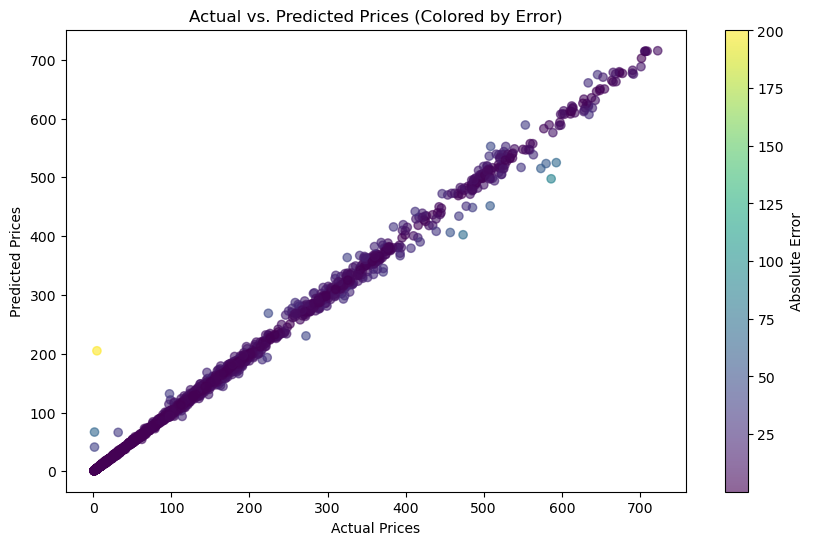

In [117]:
import matplotlib.pyplot as plt
import numpy as np

errors = np.abs(y_test - y_pred)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_test, y_pred, c=errors, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label="Absolute Error")  # Add color bar to indicate error magnitude
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Colored by Error)")
plt.show()

<h3>Regression Model Summary</h3>

The regression model performed very well in predicting the next day's stock prices. The Mean Absolute Error of 2.10 indicates that, on average, the model's predictions deviate by only $2.10 from the actual stock prices, which is highly accurate given the scale of the data. 

The R^2 value of 0.9977 suggests that the model explains nearly 99.77% of the variance in the stock prices. 

The visualization of predicted vs. actual prices further confirms this, as most points lie close to the diagonal line, showing strong agreement between the predictions and the actual values. 

<h2>Classification:  Predict whether the price will increase (1) or decrease (0)</h2>

In [123]:
# target variable for classification
company_data['Target'] = (company_data['Adj Close'].shift(-1) > company_data['Adj Close']).astype(int)

In [125]:
company_data = company_data.dropna()

In [127]:
features = ['SMA_5', 'SMA_20', 'Upper_BB', 'Lower_BB', 'RSI', 'std_dev']

In [129]:
from sklearn.model_selection import train_test_split

X = company_data[features]
y = company_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [133]:
y_pred = classifier.predict(X_test)

<h3>Classification Model Evaluation</h3>

In [135]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5051009333622748


In [139]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1079 1171]
 [1109 1248]]


In [141]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49      2250
           1       0.52      0.53      0.52      2357

    accuracy                           0.51      4607
   macro avg       0.50      0.50      0.50      4607
weighted avg       0.50      0.51      0.50      4607



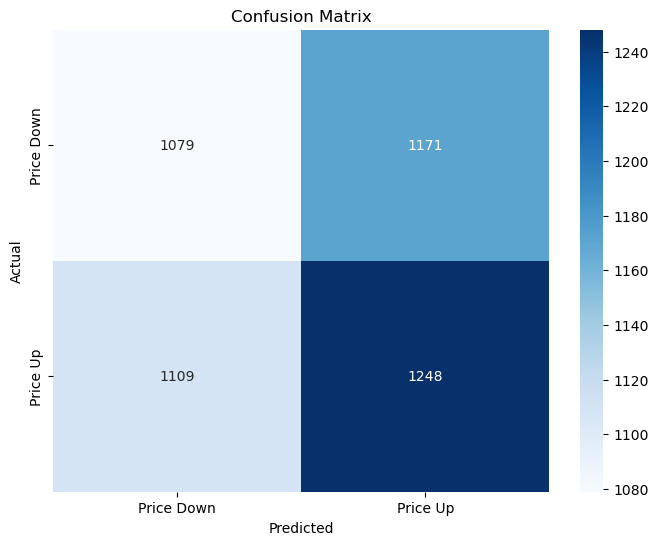

In [143]:
# confusion matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Price Down', 'Price Up'], yticklabels=['Price Down', 'Price Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h2>These classification model results are not very good, we have to make improvements to the model...</h2>

In [146]:
# analyze feature importance
# identify which features contribute the most to the classification task using feature_importances_ from the Random Forest model

import pandas as pd
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

    Feature  Importance
4       RSI    0.184932
5   std_dev    0.173420
0     SMA_5    0.163740
3  Lower_BB    0.160998
2  Upper_BB    0.160071
1    SMA_20    0.156838


In [ ]:
# all features have relatively the same performance, keep all

With Lagged Features:
Adding lagged versions of Adj Close (e.g., prices from 1, 2, or 3 days ago) explicitly includes historical price movements as part of the feature set. For instance:
- Lag_1: Adj Close from the previous day.
- Lag_2: Adj Close from two days ago.
- Lag_3: Adj Close from three days ago.

In [151]:
# add lagged features for Adj Close
company_data['Lag_1'] = company_data['Adj Close'].shift(1)
company_data['Lag_2'] = company_data['Adj Close'].shift(2)
company_data['Lag_3'] = company_data['Adj Close'].shift(3)
company_data = company_data.dropna()

In [153]:
# updating the features to include these 
features = ['SMA_5', 'SMA_20', 'Upper_BB', 'Lower_BB', 'RSI', 'std_dev', 'Lag_1', 'Lag_2', 'Lag_3']

In [155]:
# we need to also add volume related metrics

# captures the average trading volume over a certain window - overall trading activity trend.
company_data['Rolling_Volume_10'] = company_data['Volume'].rolling(window=10).mean()

# identifies days with unusually high trading volume compared to recent trends
company_data['Volume_Spike'] = company_data['Volume'] / company_data['Rolling_Volume_10']

# measures volatility of trading volume over a certain window
company_data['Rolling_Volume_Std_10'] = company_data['Volume'].rolling(window=10).std()

company_data = company_data.dropna()

In [ ]:
# update features
features = [
    'SMA_5', 'SMA_20', 'Upper_BB', 'Lower_BB', 'RSI', 'std_dev', 
    'Lag_1', 'Lag_2', 'Lag_3', 
    'Rolling_Volume_10', 'Volume_Spike', 'Rolling_Volume_Std_10'
]

<h2>Move onto new Classification Model</h2>

In [ ]:
from sklearn.model_selection import train_test_split

X = company_data[features]
y = company_data['Target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)